---
title: "DATA471: 2020 Student Visa Deviations"
author: Kim Downing
date: 2023-10-23
echo: false
include: false
bibliography: refs.bib
csl: vancouver.csl
---

* Original group members (group 15):
    * Izzy Bremner (300 487 890)
    * Tram Chau (300 643 163)
    * Kim Downing (300 639 199)
    * Amish Verma (300 598 733)

In [426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [576]:
# #| include: True
# from IPython.display import HTML
# HTML(pd.DataFrame({"Original Group Members":['Izzy Bremner', 'Tram Chau', 'Kim Downing', 'Amish Verma'],
#               "Student ID":['300 487 890', '300 643 163', '300 639 199', '300 598 733']}).to_html(index=False))

Original Group Members,Student ID
Izzy Bremner,300 487 890
Tram Chau,300 643 163
Kim Downing,300 639 199
Amish Verma,300 598 733


In [427]:
# taken from: https://www.stats.govt.nz/experimental/covid-19-data-portal on 2023-09-09
df_raw = pd.read_excel("data/covid_19_data_portal.xlsx",
                       sheet_name='data')
df_raw = df_raw[["ResourceID", "Period", "Label1", "Value", "Unit", "Measure"]]

In [559]:
df_raw.groupby('ResourceID').agg(['min'])

,Period,Label1,Value,Unit,Measure
,min,min,min,min,min
ResourceID,,,,,
CPACT12,2004-01-31,NZAC component - Card transaction spend,-75.26,%,Annual percentage change
CPTRA1,2016-01-01,New Zealand passport,0.00,Number,Border crossings - arrivals
CPVIS1,2015-01-31,Dependant,15.00,Number,People on a student visa
CPVIS2,2015-01-31,Essential skills,2073.00,Number,People on a work visa


In [428]:
def process_df(df, resource, label, val_name):
    df['Period'] = pd.to_datetime(df['Period'])
    return df.query('ResourceID == @resource & Label1 == @label')\
                .rename({'Value':val_name}, axis=1)\
                .drop(["ResourceID", "Label1", "Unit", "Measure"], axis=1)\
                .set_index("Period")\
                .copy()

border_df_daily = process_df(df_raw, "CPTRA1", "Total", "border_arrivals") # daily
border_df = border_df_daily.groupby(pd.Grouper(freq='M'))['border_arrivals']\
                            .agg(['sum', len, 'mean', 'min', 'max']) # monthly
border_df = border_df.rename({"sum":"total_border",
                                "len":"n_days",
                                "mean":"mean_border",
                                "min":"min_border",
                                "max":"max_border"}, axis=1)

activ_df = process_df(df_raw, "CPACT12", "New Zealand Activity Index (NZAC)", "activity") # monthly
stu_df = process_df(df_raw, "CPVIS1", "Fee paying", "student_visas") # monthly
work_df = process_df(df_raw, "CPVIS2", "Total", "work_visas") # monthly

df = border_df.join(activ_df).join(work_df).join(stu_df).dropna()
df_trunc = df.query('Period < "2020"')

In [597]:
border_df_daily.describe()

,border_arrivals
count,2807.000000
mean,12759.820805
std,8102.351348
min,0.000000
25%,3045.500000
50%,15537.000000
75%,19001.000000
max,31612.000000


In [429]:
activ_df

,activity
Period,
2004-01-31,4.1645
2004-02-29,4.2741
2004-03-31,5.8555
2004-04-30,6.4044
2004-05-31,5.8393
...,...
2023-03-31,1.4820
2023-04-30,0.9476
2023-05-31,0.8810


In [430]:
border_df

,total_border,n_days,mean_border,min_border,max_border
Period,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0
...,...,...,...,...,...
2023-05-31,379405.0,31,12238.870968,10589.0,13873.0
2023-06-30,406391.0,30,13546.366667,11067.0,17005.0
2023-07-31,517796.0,31,16703.096774,13209.0,19874.0


<Axes: xlabel='Period'>

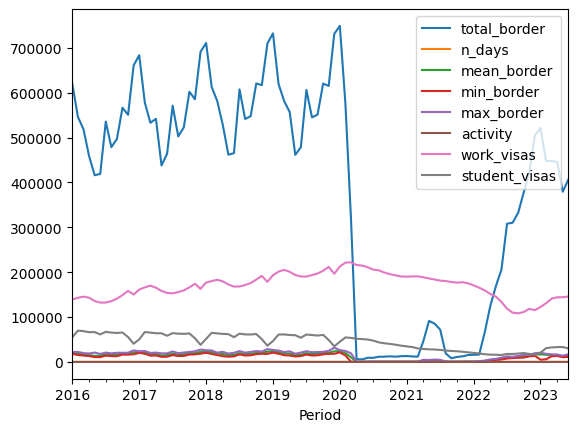

In [431]:
df.plot()

In [432]:
df.describe()

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,385848.644444,30.422222,12688.128833,10107.833333,15450.200000,2.404609,169767.800000,45429.266667
std,245591.311144,0.834344,8074.821791,6995.711974,9400.945903,4.093974,28209.648699,17494.452495
min,5622.000000,28.000000,181.354839,0.000000,513.000000,-13.616500,108300.000000,15435.000000
25%,86837.250000,30.000000,2870.032258,674.500000,4923.750000,1.312900,146583.750000,30039.000000
50%,464733.000000,31.000000,15491.100000,12608.500000,19263.000000,2.219700,173404.500000,50493.000000
75%,574226.250000,31.000000,18759.483871,15389.250000,22253.500000,3.206800,190712.250000,61342.500000
max,748999.000000,31.000000,24161.258065,21076.000000,31612.000000,33.793400,222039.000000,69807.000000


In [433]:
border_df_daily.groupby(pd.Grouper(freq='M'))['border_arrivals'].agg(['sum', len, 'mean', 'min', 'max']) # monthly

,sum,len,mean,min,max
Period,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0
...,...,...,...,...,...
2023-05-31,379405.0,31,12238.870968,10589.0,13873.0
2023-06-30,406391.0,30,13546.366667,11067.0,17005.0
2023-07-31,517796.0,31,16703.096774,13209.0,19874.0


In [434]:
df

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
Period,,,,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0,2.7881,138975.0,55308.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0,3.2814,143052.0,69807.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0,3.2461,145572.0,68580.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0,3.2482,143088.0,66309.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0,2.8394,135846.0,66525.0
...,...,...,...,...,...,...,...,...
2023-02-28,448064.0,28,16002.285714,5876.0,18032.0,1.4768,130839.0,30705.0
2023-03-31,447713.0,31,14442.354839,12568.0,16910.0,1.4820,141033.0,32253.0
2023-04-30,446057.0,30,14868.566667,13271.0,16431.0,0.9476,144075.0,33051.0


In [435]:
work_df.head(10)

,work_visas
Period,
2015-01-31,123504.0
2015-02-28,126324.0
2015-03-31,128370.0
2015-04-30,126129.0
2015-05-31,119424.0
2015-06-30,115965.0
2015-07-31,114624.0
2015-08-31,116472.0
2015-09-30,121068.0


In [436]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [437]:
def diff_n(df, n=1):
    df = df.copy()
    for i in range(n):
        df = df.diff().dropna()
    return df

def dft(series):
    return round(adfuller(series)[1], 5)

In [438]:
dft_df = pd.DataFrame()
for i in df.columns:
    for j in range(5):
        dft_df.loc[i, j] = dft(diff_n(df[i], j))

dft_df
# we'll difference everything twice for simplicity

,0,1,2,3,4
total_border,0.29189,0.24490,0.00000,0.0,0.0
n_days,0.09044,0.00000,0.00000,0.0,0.0
mean_border,0.28806,0.02061,0.00000,0.0,0.0
min_border,0.54119,0.00000,0.00000,0.0,0.0
max_border,0.53686,0.00000,0.00000,0.0,0.0
activity,0.00000,0.00000,0.00000,0.0,0.0
work_visas,0.07327,0.54122,0.00031,0.0,0.0
student_visas,0.48119,0.77719,0.00000,0.0,0.0


In [440]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def xform_ts(df, scaler):
    df2 = diff_n(df.copy(), 2)
    df2[df2.columns] = scaler.fit_transform(df2[df2.columns])
    return df2

df2_t = xform_ts(df_trunc, scaler)
#df2 = xform_ts(df, scaler)

In [441]:
df_initial = df.iloc[:2, :] # bits which will be lost during diffing, needed to un-xform data
#df_initial_t = df_trunc.iloc[:2, :] # bits which will be lost during diffing, needed to un-xform data

def inv_diff(df, org, scaler):
    # assumes two differences
    # unscale the values
    df = df.copy()
    df[df.columns] = scaler.inverse_transform(df[df.columns])

    # undiff the data
    # add on the last NA value (DIFFERENCED), in this case from the second row as we difference twice to go from d2 => d1
    org_d1 = pd.DataFrame(org.diff().iloc[1]).T 
    df2 = pd.concat([org_d1, df])
    df2 = df2.cumsum()
    # add on the first NA value (RAW) to go from d1 => raw
    df2 = pd.concat([pd.DataFrame(org.iloc[0]).T, df2])
    df2 = df2.cumsum()
    return df2

In [442]:
df

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
Period,,,,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0,2.7881,138975.0,55308.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0,3.2814,143052.0,69807.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0,3.2461,145572.0,68580.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0,3.2482,143088.0,66309.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0,2.8394,135846.0,66525.0
...,...,...,...,...,...,...,...,...
2023-02-28,448064.0,28,16002.285714,5876.0,18032.0,1.4768,130839.0,30705.0
2023-03-31,447713.0,31,14442.354839,12568.0,16910.0,1.4820,141033.0,32253.0
2023-04-30,446057.0,30,14868.566667,13271.0,16431.0,0.9476,144075.0,33051.0


<Axes: xlabel='Period'>

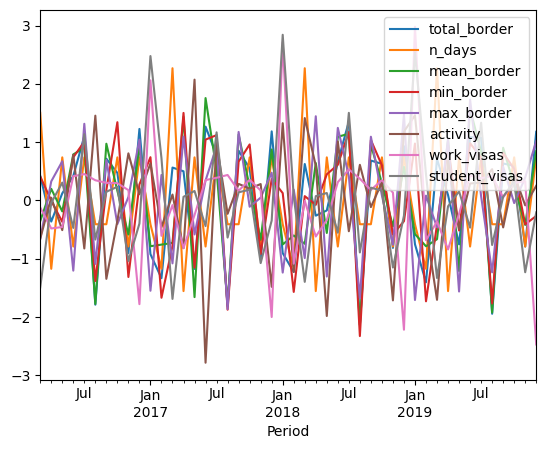

In [443]:
df2_t.plot()

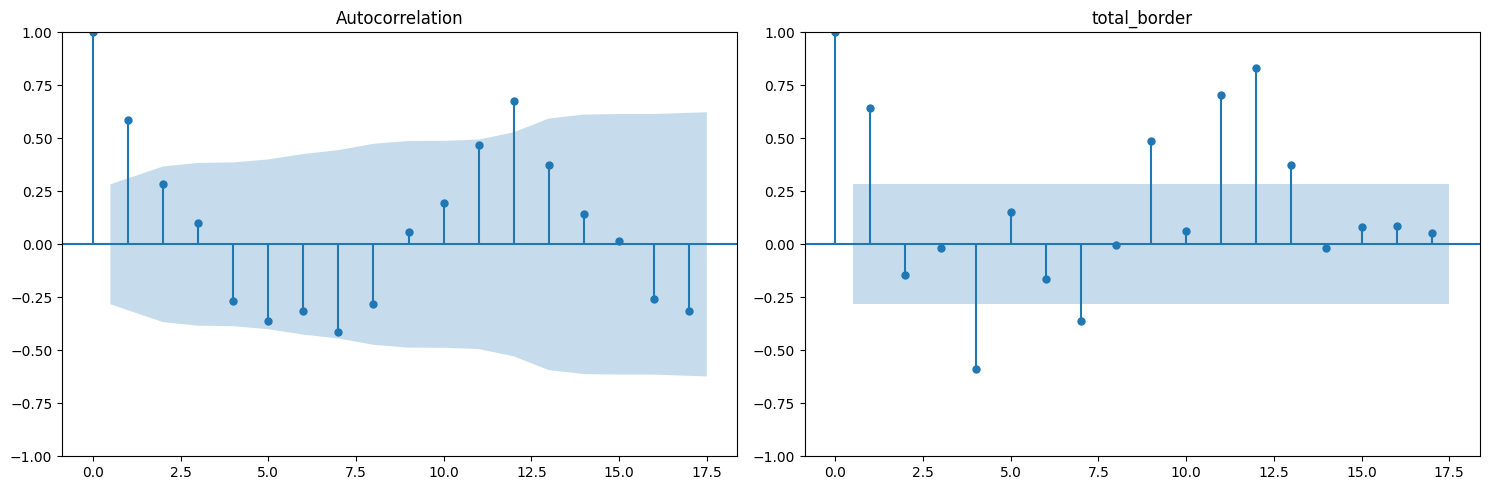

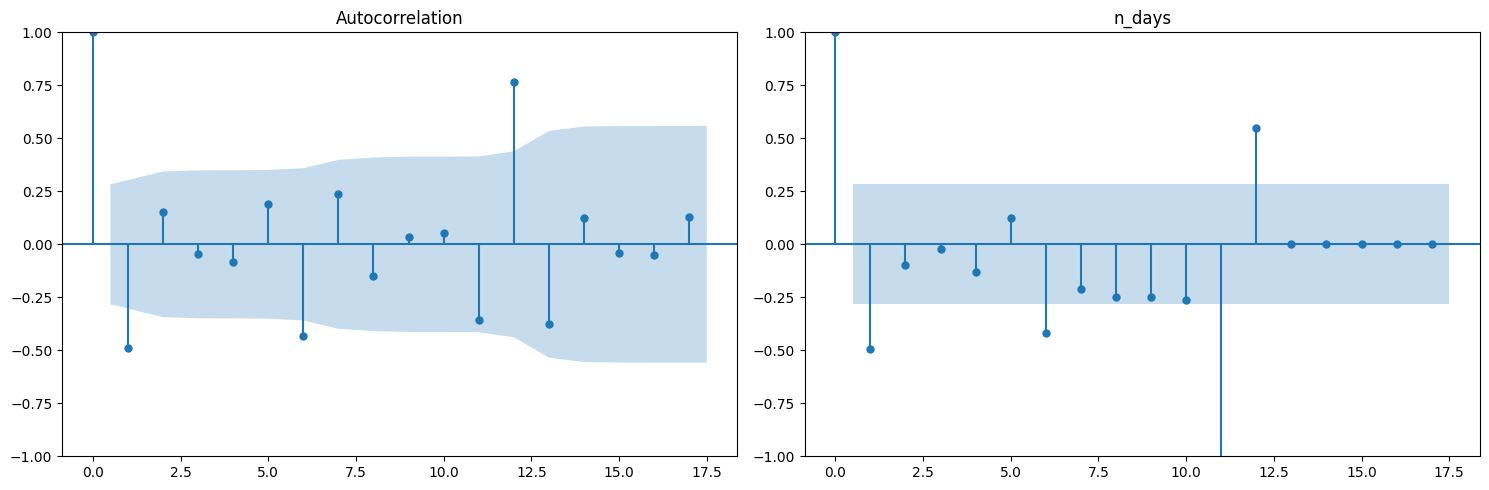

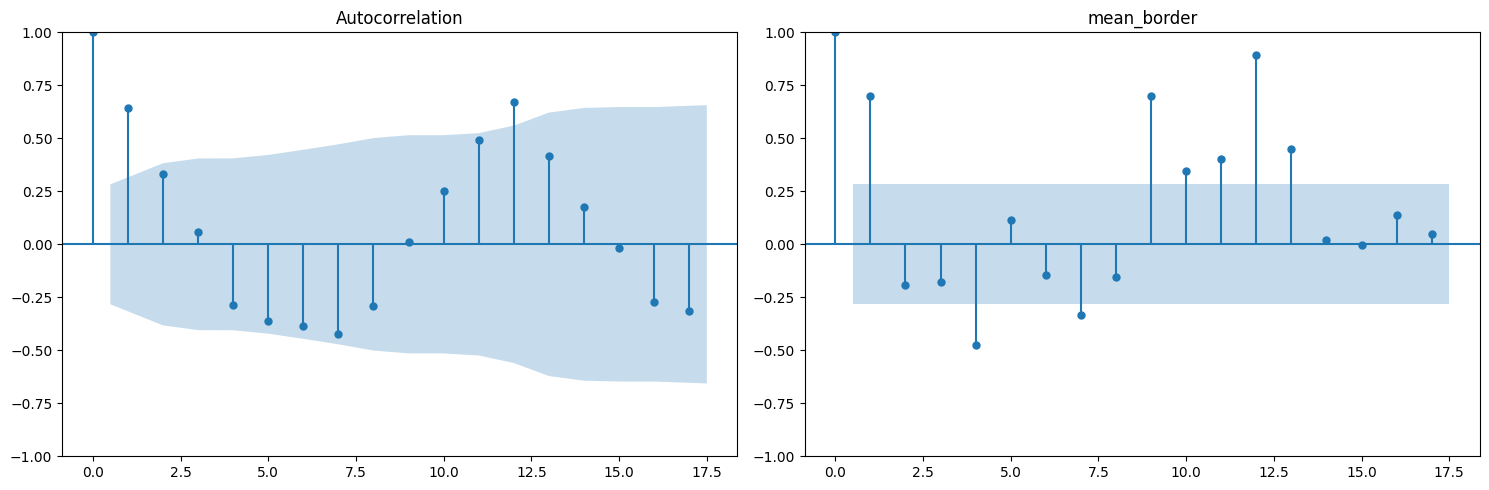

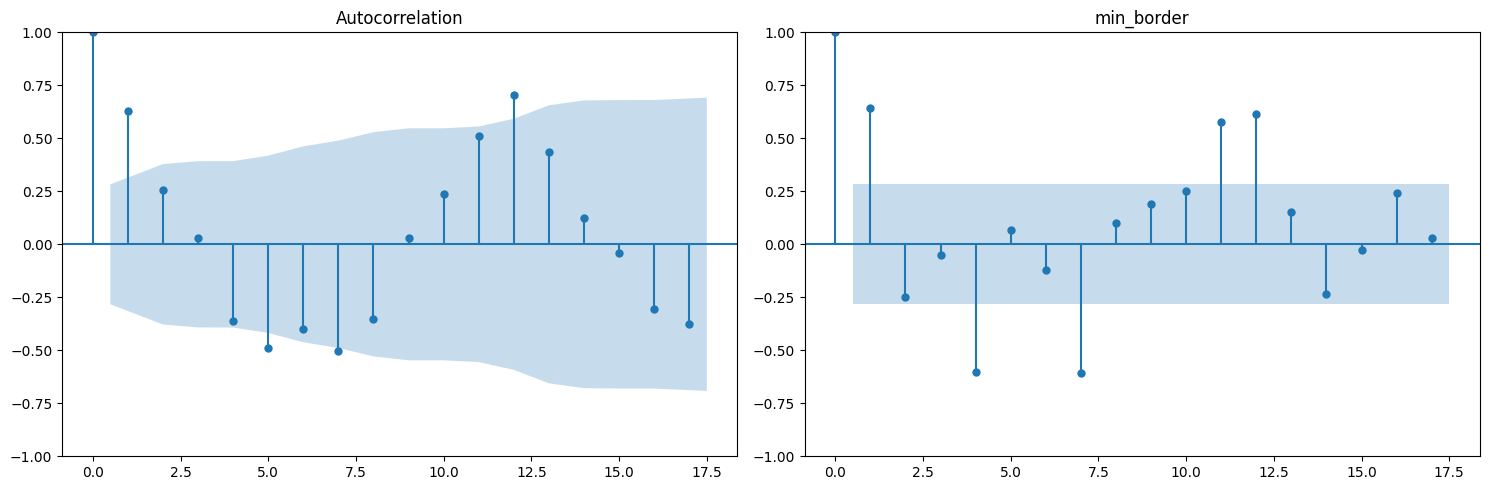

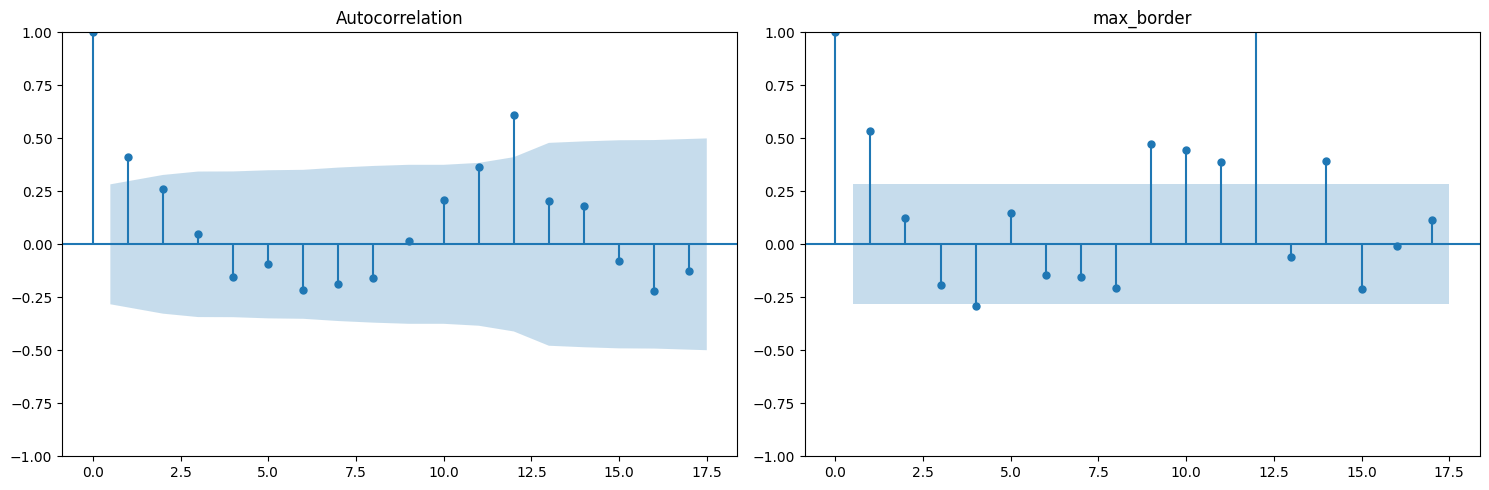

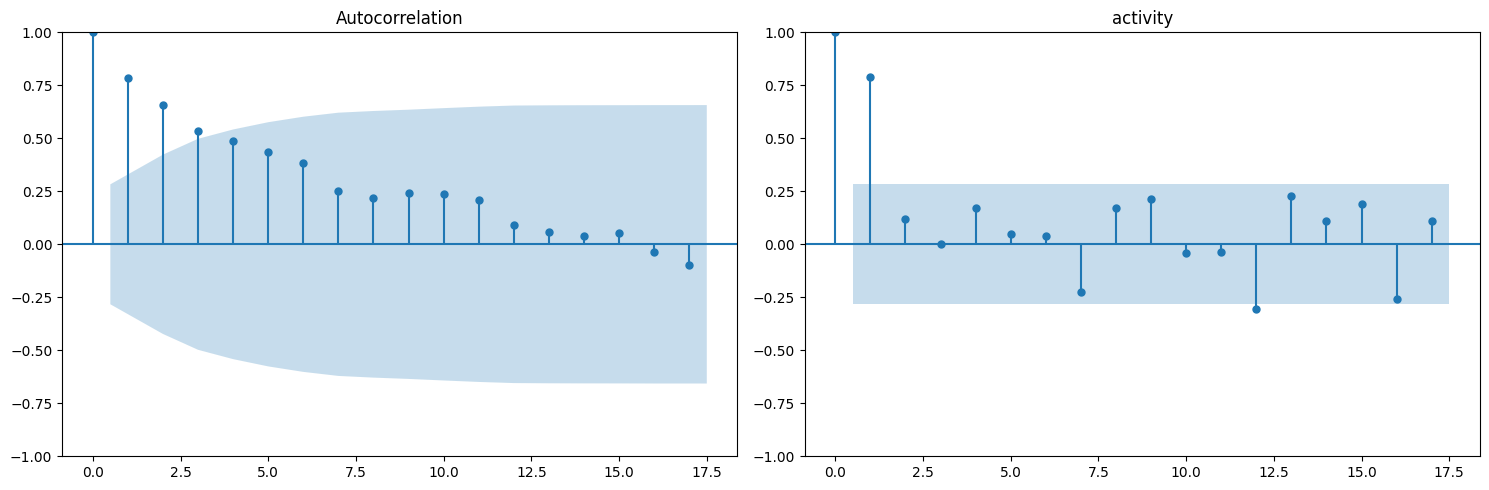

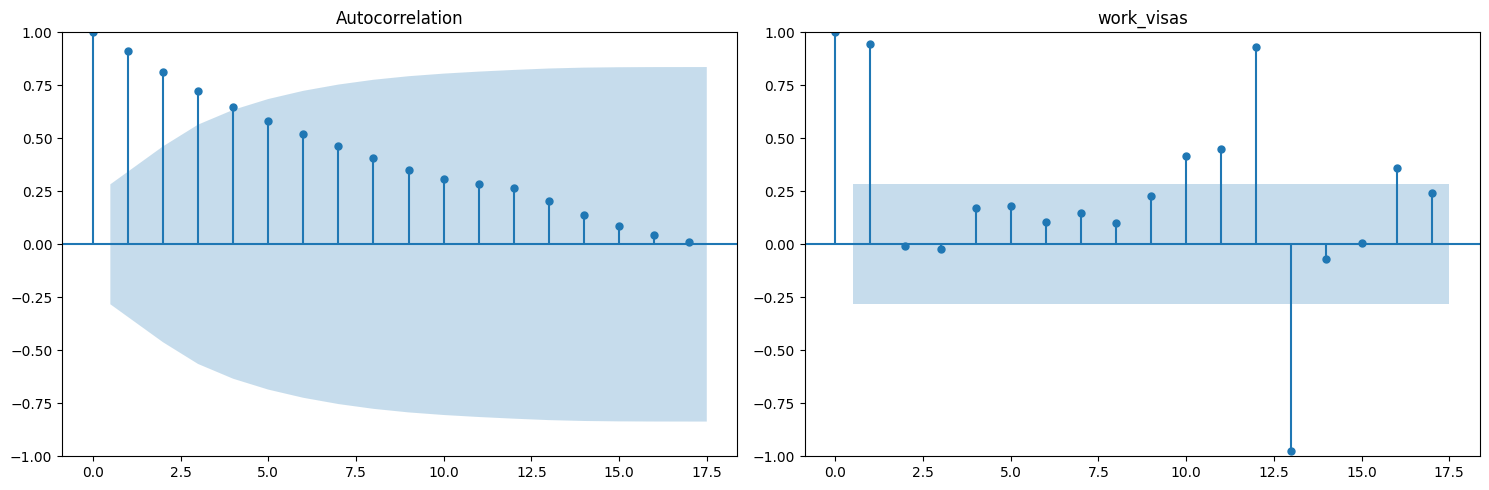

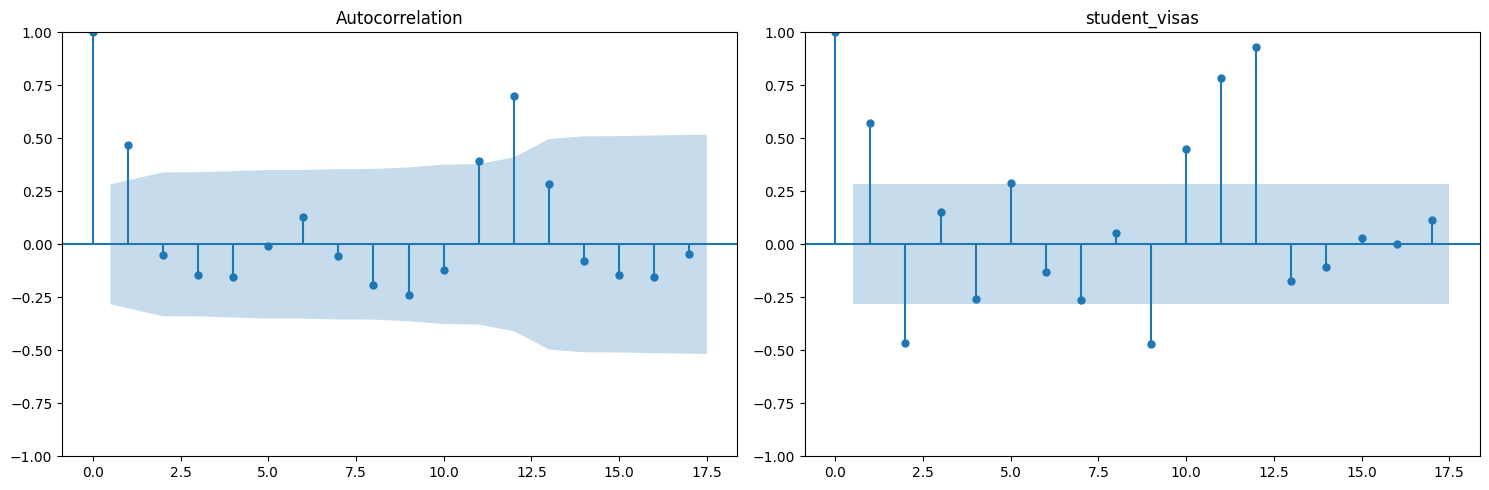

In [444]:
for col in df_trunc.columns:
    h = 5
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(h*3, h))
    plot_acf(df_trunc[col], ax=ax[0])
    plot_pacf(df_trunc[col], ax=ax[1], method='ols')
    plt.title(label=f'{col}')
    plt.tight_layout()
    plt.show()

In [445]:
df.columns

Index(['total_border', 'n_days', 'mean_border', 'min_border', 'max_border',
       'activity', 'work_visas', 'student_visas'],
      dtype='object')

In [446]:
from statsmodels.tsa.stattools import grangercausalitytests as granger
import warnings
warnings.filterwarnings('ignore')

In [447]:
?granger

Signature: granger(x, maxlag, addconst=True, verbose=None)
Docstring:
Four tests for granger non causality of 2 time series.

All four tests give similar results. `params_ftest` and `ssr_ftest` are
equivalent based on F test which is identical to lmtest:grangertest in R.

Parameters
----------
x : array_like
    The data for testing whether the time series in the second column Granger
    causes the time series in the first column. Missing values are not
    supported.
maxlag : {int, Iterable[int]}
    If an integer, computes the test for all lags up to maxlag. If an
    iterable, computes the tests only for the lags in maxlag.
addconst : bool
    Include a constant in the model.
verbose : bool
    Print results. Deprecated

    .. deprecated: 0.14

       verbose is deprecated and will be removed after 0.15 is released



Returns
-------
dict
    All test results, dictionary keys are the number of lags. For each
    lag the values are a tuple, with the first element a dictionary with


In [626]:
testcol = 'student_visas'
for i in df.columns:
        if i != testcol:
            _ = granger(df[[testcol, i]], maxlag=4)
            print(f"{testcol}, {i}\n")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.6056 , p=0.0006  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=13.0453 , p=0.0003  , df=1
likelihood ratio test: chi2=12.1735 , p=0.0005  , df=1
parameter F test:         F=12.6056 , p=0.0006  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.8240  , p=0.0043  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=12.3496 , p=0.0021  , df=2
likelihood ratio test: chi2=11.5565 , p=0.0031  , df=2
parameter F test:         F=5.8240  , p=0.0043  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.2554  , p=0.0007  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=20.4084 , p=0.0001  , df=3
likelihood ratio test: chi2=18.3335 , p=0.0004  , df=3
parameter F test:         F=6.2554  , p=0.0007  , df_denom=80, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.8384  , p=0.0004  , df_d

In [627]:
for i in df_trunc.columns:
    for j in df_trunc.columns:
        if i != j:
            _ = granger(df_trunc[[i, j]], maxlag=4)
            print(f"{i}, {j}\n")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9839  , p=0.3267  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=1.0510  , p=0.3053  , df=1
likelihood ratio test: chi2=1.0394  , p=0.3080  , df=1
parameter F test:         F=0.9839  , p=0.3267  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8214  , p=0.1746  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=4.0871  , p=0.1296  , df=2
likelihood ratio test: chi2=3.9156  , p=0.1412  , df=2
parameter F test:         F=1.8214  , p=0.1746  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5305  , p=0.0237  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=12.5424 , p=0.0057  , df=3
likelihood ratio test: chi2=11.0637 , p=0.0114  , df=3
parameter F test:         F=3.5305  , p=0.0237  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4606  , p=0.2351  , df_d

ssr based F test:         F=5.2750  , p=0.0265  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=5.6346  , p=0.0176  , df=1
likelihood ratio test: chi2=5.3217  , p=0.0211  , df=1
parameter F test:         F=5.2750  , p=0.0265  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=19.4732 , p=0.0000  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=43.6960 , p=0.0000  , df=2
likelihood ratio test: chi2=30.7181 , p=0.0000  , df=2
parameter F test:         F=19.4732 , p=0.0000  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.0370 , p=0.0000  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=46.3157 , p=0.0000  , df=3
likelihood ratio test: chi2=31.8447 , p=0.0000  , df=3
parameter F test:         F=13.0370 , p=0.0000  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=20.0180 , p=0.0000  , df_denom=35, df_num=4
ssr based chi2 test:   chi2=

In [450]:
# preds_df = pd.concat([df2_t.head(22), 
#                       pd.DataFrame(index=pd.date_range('2018-01-31', periods=36, freq='M'),
#                                    columns=df2_t.columns)])
# preds_df

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
2016-03-31,0.420766,1.504109,-0.352508,0.414365,-0.659568,-0.654556,-0.118933,-1.490829
2016-04-30,-0.361704,-1.171709,0.199948,-0.003734,0.327408,0.047513,-0.479993,-0.041461
2016-05-31,0.122921,0.739589,-0.187328,-0.365576,0.671833,-0.508561,-0.454225,0.307110
2016-06-30,0.419669,-0.789449,0.789773,0.740256,-1.202970,0.784810,0.416216,-0.470882
2016-07-31,1.103360,0.739589,0.907053,1.009557,1.315513,-0.823127,0.453296,1.136927
2016-08-31,-1.786985,-0.407190,-1.774754,-1.381197,-1.088011,1.454752,0.347084,-0.669600
2016-09-30,0.716528,-0.407190,0.973406,0.179351,0.693967,-1.343725,0.302462,0.150149
2016-10-31,0.473049,0.739589,0.165348,1.342771,-0.404807,-0.349293,0.297120,0.235145
2016-11-30,-0.902022,-0.789449,-0.584159,-1.311958,0.059772,0.808625,0.177395,-1.037717
2016-12-31,1.227450,0.739589,0.945784,0.274888,1.043812,0.107549,-1.778113,-0.395955


In [451]:
# for i in mod_forecast[0]:
#     print(i)

0.7286609427373352
-3.8607797966149002
2.8237534895976486
0.2702007362102352
0.9065221422117458
-10.521515931445705
-9.208797411807526
-2.6409119519983384


In [549]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error as mse, mean_absolute_percentage_error as mape, mean

offset = 22
preds_df = pd.concat([df2_t.head(offset), 
                      pd.DataFrame(index=pd.date_range('2018-01-31', periods=24, freq='M'),
                                   columns=df2_t.columns)])
# preds_ci_lower = pd.concat([df2_t.head(offset), 
#                       pd.DataFrame(index=pd.date_range('2018-01-31', periods=24, freq='M'),
#                                    columns=df2_t.columns)])
# preds_ci_upper = pd.concat([df2_t.head(offset), 
#                       pd.DataFrame(index=pd.date_range('2018-01-31', periods=24, freq='M'),
#                                    columns=df2_t.columns)])

for i in range(len(df2_t)):
    if i < offset:
        continue
    train = preds_df.iloc[0:i, ]
    mod = VAR(train)
    mod_fit = mod.fit(4)
    mod_forecast, t_ci_l, t_ci_u = mod_fit.forecast_interval(mod_fit.endog, steps=1)
    #print(t_ci_l[0], t_ci_u[0])
    for j in range(len(mod_forecast[0])):
        preds_df.iloc[i, j] = mod_forecast[0][j]
        #preds_ci_lower.iloc[i, j] = t_ci_l[0][j]
        #preds_ci_upper.iloc[i, j] = t_ci_u[0][j]

preds_df

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
2016-03-31,0.420766,1.504109,-0.352508,0.414365,-0.659568,-0.654556,-0.118933,-1.490829
2016-04-30,-0.361704,-1.171709,0.199948,-0.003734,0.327408,0.047513,-0.479993,-0.041461
2016-05-31,0.122921,0.739589,-0.187328,-0.365576,0.671833,-0.508561,-0.454225,0.307110
2016-06-30,0.419669,-0.789449,0.789773,0.740256,-1.202970,0.784810,0.416216,-0.470882
2016-07-31,1.103360,0.739589,0.907053,1.009557,1.315513,-0.823127,0.453296,1.136927
2016-08-31,-1.786985,-0.407190,-1.774754,-1.381197,-1.088011,1.454752,0.347084,-0.669600
2016-09-30,0.716528,-0.407190,0.973406,0.179351,0.693967,-1.343725,0.302462,0.150149
2016-10-31,0.473049,0.739589,0.165348,1.342771,-0.404807,-0.349293,0.297120,0.235145
2016-11-30,-0.902022,-0.789449,-0.584159,-1.311958,0.059772,0.808625,0.177395,-1.037717
2016-12-31,1.227450,0.739589,0.945784,0.274888,1.043812,0.107549,-1.778113,-0.395955


In [550]:
preds_inv_df = inv_diff(preds_df, df_initial, scaler)['2018':]
comp_inv_df = inv_diff(df2_t, df_initial, scaler)['2018':]

In [554]:
for col in preds_inv_df.columns:
    print("RMSE", col, np.sqrt(mse(preds_inv_df[col], comp_inv_df[col])))

RMSE total_border 70031.82680386418
RMSE n_days 1.4746057896468616
RMSE mean_border 2013.4721198004609
RMSE min_border 1598.7285172277925
RMSE max_border 5492.621240064735
RMSE activity 2.2244418445861727
RMSE work_visas 25079.07960668273
RMSE student_visas 7071.016253744139


In [555]:
for col in preds_inv_df.columns:
    print("MAPE", col, mape(preds_inv_df[col], comp_inv_df[col])*100)

MAPE total_border 11.94623592123702
MAPE n_days 3.64832657156035
MAPE mean_border 10.304013034360429
MAPE min_border 9.769545277993224
MAPE max_border 16.020081470950544
MAPE activity 47.27192560297662
MAPE work_visas 12.17055440422272
MAPE student_visas 11.048535900831874


In [504]:
mse(preds_inv_df, comp_inv_df)

702524396.0404874

In [512]:
mape(preds_inv_df, comp_inv_df)*100

15.2724022730166

<Axes: >

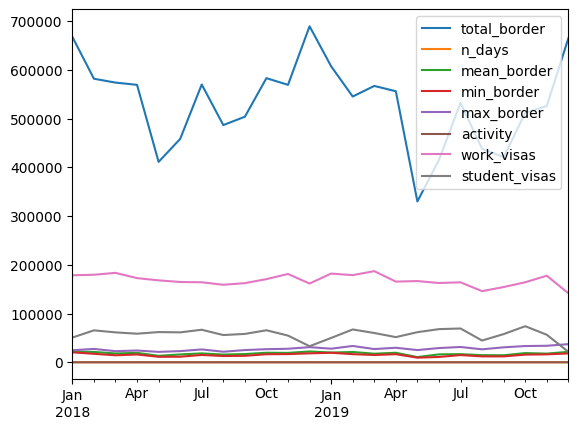

In [508]:
preds_inv_df.plot()

In [506]:
preds_inv_df.head()

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
2018-01-31,668233.537763,30.634042,21745.566469,20468.821690,24646.598603,3.105356,178616.291467,50706.166648
2018-02-28,582196.521875,27.243341,21225.344946,17399.095296,27427.185457,3.820972,179710.317641,65567.289287
2018-03-31,574247.292505,31.655622,18104.741335,14387.590911,22800.561670,4.706340,183573.868317,61393.713736
2018-04-30,569627.678115,29.429041,19324.166516,16010.697620,24154.815010,3.693571,172802.284196,58682.316258
2018-05-31,411458.645101,30.881543,13283.816726,11255.298205,21356.058029,5.124874,168213.579183,62033.699649


In [507]:
comp_inv_df.head()

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
2018-01-31,710957.0,31.0,22934.096774,20334.0,25991.0,2.9747,176970.0,51378.0
2018-02-28,613052.0,28.0,21894.714286,17667.0,25438.0,2.1765,180273.0,64845.0
2018-03-31,581433.0,31.0,18755.903226,15285.0,20660.0,2.5170,183096.0,63552.0
2018-04-30,528093.0,30.0,17603.100000,12742.0,22425.0,3.3390,179601.0,62388.0
2018-05-31,461888.0,31.0,14899.612903,11610.0,18561.0,2.5630,172485.0,61902.0


In [453]:
# ts_split = TimeSeriesSplit(n_splits=4)

# for train_index, test_index in ts_split.split(df_trunc):
#     train = df_trunc.iloc[train_index, :]
#     test = df_trunc.iloc[test_index, :]
#     mod = VAR(train)
#     mod_fit = mod.fit(4)
#     mod_forecast = mod_fit.forecast(mod_fit.endog, 6)
#     print(pd.DataFrame(mod_forecast), train)
#     break

In [454]:
mod_res = pd.DataFrame(index=range(12),
                        columns=['aic', 'bic'])

ts_split = TimeSeriesSplit(n_splits=4)

for train_index, test_index in ts_split.split(df_trunc):
    train = df_trunc.iloc[train_index, :]
    test = df_trunc.iloc[test_index, :]
    # do something

for i in range(12):
    mod = VAR(df2_t)
    res = mod.fit(i)
    mod_res.loc[i, 'aic'] = res.aic
    mod_res.loc[i, 'bic'] = res.bic
    print(f"model {i}: {mod.select_order()}")

mod_res

model 0: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 1: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 2: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 3: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 4: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 5: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 6: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 7: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object.

,aic,bic
0,-10.068338,-9.750314
1,-16.651006,-13.760346
2,-23.345536,-17.830768
3,-29.303386,-21.111758
4,-47.601809,-36.679314
5,-inf,-inf
6,-520.32182,-503.770801
7,-523.639541,-504.188666
8,-517.063008,-494.653934
9,-511.589196,-486.162816


In [455]:
# for i, (train_index, test_index) in enumerate(ts_split.split(df_trunc)):
#     print(f"Fold {i}:")
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")

In [456]:
from statsmodels.tsa.vector_ar.var_model import VAR
mod_res = pd.DataFrame(index=range(12),
                        columns=['aic', 'bic'])

for i in range(12):
    mod = VAR(df2_t)
    res = mod.fit(i)
    mod_res.loc[i, 'aic'] = res.aic
    mod_res.loc[i, 'bic'] = res.bic
    print(f"model {i}: {mod.select_order()}")

mod_res

model 0: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 1: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 2: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 3: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 4: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 5: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 6: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 7: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object.

,aic,bic
0,-10.068338,-9.750314
1,-16.651006,-13.760346
2,-23.345536,-17.830768
3,-29.303386,-21.111758
4,-47.601809,-36.679314
5,-inf,-inf
6,-520.32182,-503.770801
7,-523.639541,-504.188666
8,-517.063008,-494.653934
9,-511.589196,-486.162816


In [457]:
mod1 = VAR(df2_t)
res1 = mod1.fit(4)

In [458]:
res1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 22, Oct, 2023
Time:                     08:55:00
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -36.6793
Nobs:                     42.0000    HQIC:                  -43.5983
Log likelihood:           786.875    FPE:                1.71256e-19
AIC:                     -47.6018    Det(Omega_mle):     1.65634e-21
--------------------------------------------------------------------
Results for equation total_border
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.087913         0.080501            1.092           0.275
L1.total_border         -1.917735         5.938860           -0.323           0.747
L1.n_days                0.046878        

In [459]:
preds = pd.DataFrame(res1.forecast(res1.endog, steps=12),
                    index=pd.date_range('2020-01-31', periods=12, freq='M'),
                    columns=df_trunc.columns)

In [460]:
t_preds, t_ci_l, t_ci_u = res1.forecast_interval(res1.endog, steps=12)

In [461]:
pd.DataFrame(t_ci_l)

,0,1,2,3,4,5,6,7
0,-1.311493,-0.372940,-1.249666,0.359328,-2.765748,-1.465567,2.805268,2.506734
1,-2.030145,-1.609109,-1.362282,-3.482614,0.443984,-0.627292,-1.167543,0.103163
2,0.814124,2.428019,-0.816883,-0.891282,-0.928679,-4.285172,-0.847096,-1.936662
3,-1.496195,-1.962778,-0.670662,-0.415814,-0.095754,-1.565561,-1.155068,-0.726472
4,-1.552753,0.279716,-2.153212,-2.334975,-1.838346,-5.510332,-1.349357,-0.034083
5,0.369530,-1.114970,0.623711,0.114493,0.651328,-3.124707,0.447815,-0.968555
6,-0.022218,-0.291751,-0.160768,-0.387225,-0.910714,-3.588312,-0.648873,0.715799
7,-3.146178,-0.519236,-3.621506,-3.713224,-2.039079,-2.676791,-0.487664,-1.544320
8,-0.637146,-1.566170,-0.230231,-0.883761,-0.704703,-4.057764,-0.602804,-0.528580
9,-0.321432,0.141573,-0.829853,-0.398972,-0.975088,-4.066502,-0.445419,0.079089


In [462]:
pd.DataFrame(t_ci_u)

,0,1,2,3,4,5,6,7
0,-0.664212,-0.246445,-0.509410,1.751604,-2.279297,0.796580,3.128465,2.768457
1,-1.097076,-1.325206,-0.250250,-1.401472,1.437368,3.225110,-0.477045,0.733347
2,2.278926,2.823718,0.925506,1.635507,0.216143,1.254255,0.167531,-1.255966
3,0.293672,-1.469931,1.442342,2.186693,1.200225,5.005076,0.139037,0.177903
4,0.328596,1.016057,0.086910,0.363919,-0.347553,1.422559,-0.021607,0.896619
5,2.322955,-0.027163,2.899639,2.854176,2.364040,3.951355,1.826945,0.088770
6,2.032962,0.955468,2.158352,2.374026,0.989509,3.576926,0.862124,1.839517
7,-0.984959,0.818054,-1.215545,-0.861029,-0.094718,4.599734,1.099723,-0.229573
8,1.572724,-0.141160,2.226451,2.016283,1.346988,3.460328,1.011311,0.818442
9,1.926580,1.631103,1.660352,2.604680,1.224941,3.513924,1.193034,1.445975


In [463]:
#pd.DataFrame([t_ci_l, t_preds, t_ci_u])

In [464]:
res1.forecast(res1.endog, steps=12)

array([[-0.98785296, -0.30969266, -0.87953792,  1.05546612, -2.52252277,
        -0.33449311,  2.96686666,  2.63759591],
       [-1.56361008, -1.4671572 , -0.80626573, -2.44204268,  0.94067622,
         1.2989091 , -0.82229413,  0.4182549 ],
       [ 1.54652529,  2.62586816,  0.05431156,  0.37211228, -0.35626806,
        -1.51545844, -0.33978274, -1.59631425],
       [-0.60126124, -1.7163546 ,  0.38584009,  0.88543996,  0.55223565,
         1.71975786, -0.50801546, -0.2742847 ],
       [-0.61207821,  0.64788654, -1.03315091, -0.98552812, -1.09294969,
        -2.04388641, -0.68548225,  0.43126802],
       [ 1.34624218, -0.5710666 ,  1.76167532,  1.48433434,  1.50768367,
         0.41332426,  1.13737969, -0.4398929 ],
       [ 1.00537231,  0.33185853,  0.99879185,  0.99340054,  0.03939762,
        -0.0056928 ,  0.10662547,  1.27765831],
       [-2.06556839,  0.14940908, -2.41852524, -2.28712656, -1.06689855,
         0.96147148,  0.30602941, -0.88694692],
       [ 0.46778925, -0.85366497

In [465]:
df2_t.head()

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
Period,,,,,,,,
2016-03-31,0.420766,1.504109,-0.352508,0.414365,-0.659568,-0.654556,-0.118933,-1.490829
2016-04-30,-0.361704,-1.171709,0.199948,-0.003734,0.327408,0.047513,-0.479993,-0.041461
2016-05-31,0.122921,0.739589,-0.187328,-0.365576,0.671833,-0.508561,-0.454225,0.307110
2016-06-30,0.419669,-0.789449,0.789773,0.740256,-1.202970,0.784810,0.416216,-0.470882
2016-07-31,1.103360,0.739589,0.907053,1.009557,1.315513,-0.823127,0.453296,1.136927


In [466]:
full_df2_t = pd.concat([df2_t, preds])
raw_res = inv_diff(full_df2_t, df_initial, scaler)
scale_res = raw_res.copy()
raw_comp = scale_comp = df.query('Period < "2021"')
scale_comp = raw_comp.copy()

In [467]:
scale_res[scale_res.columns] = scaler.transform(raw_res[raw_res.columns])
scale_comp[scale_comp.columns] = scaler.transform(raw_comp[raw_comp.columns])

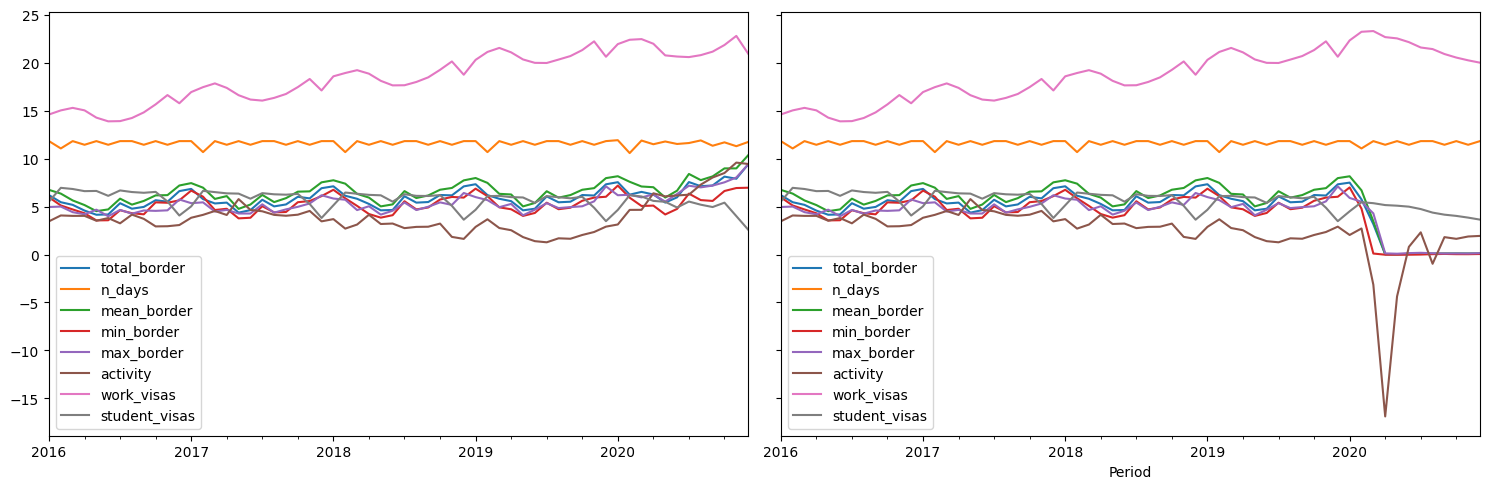

In [468]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(h*3, h), sharey=True)
scale_res.plot(ax=ax[0])
scale_comp.plot(ax=ax[1])
plt.tight_layout()
plt.show()

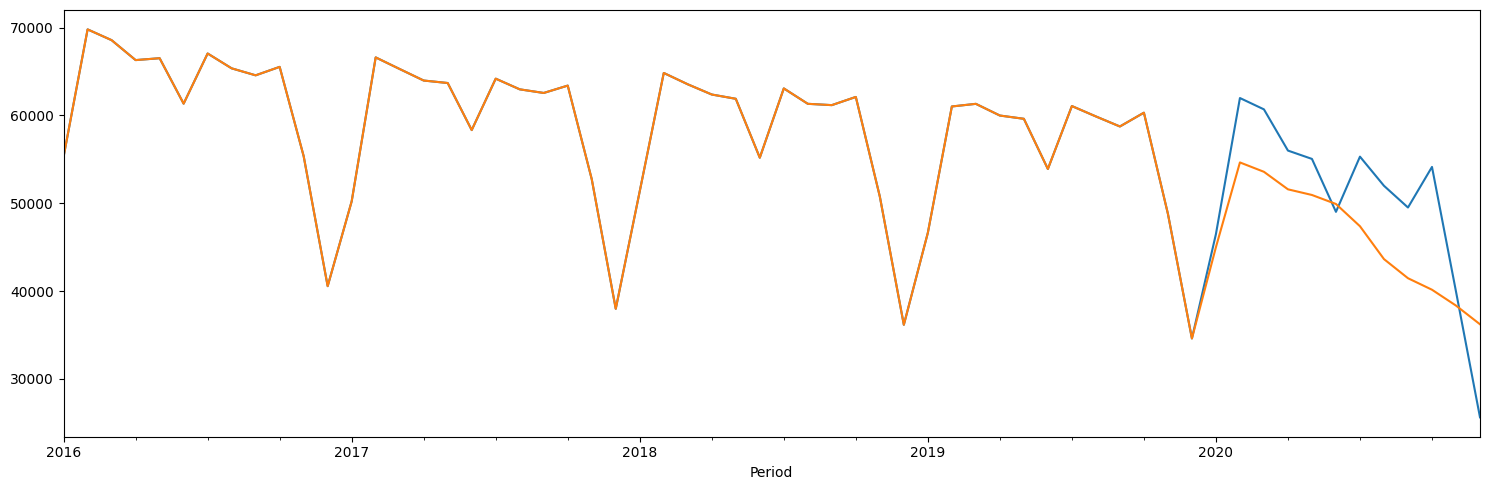

In [469]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(h*3, h))
raw_res['student_visas'].plot(ax=ax)
raw_comp['student_visas'].plot(ax=ax)
plt.tight_layout()
plt.show()

In [470]:
round((raw_res['student_visas'] - raw_comp['student_visas']).sum()) # lost this many paying students to Covid in 2020

52895

<Axes: >

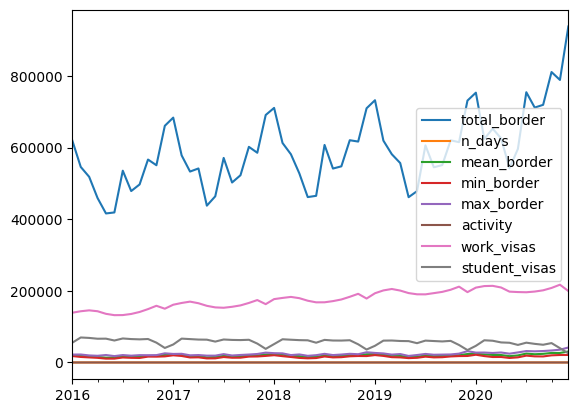

In [471]:
raw_res.plot()

<Axes: xlabel='Period'>

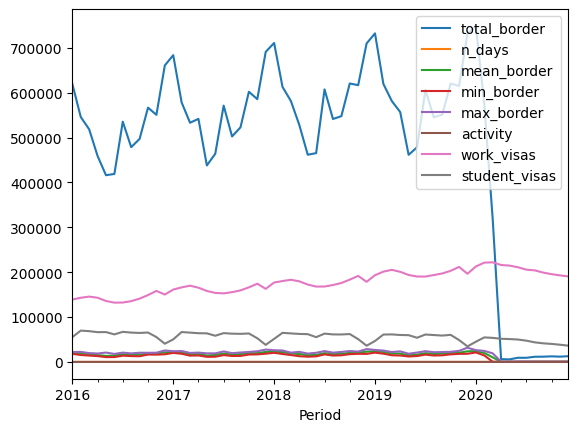

In [472]:
raw_comp.plot()

<Axes: >

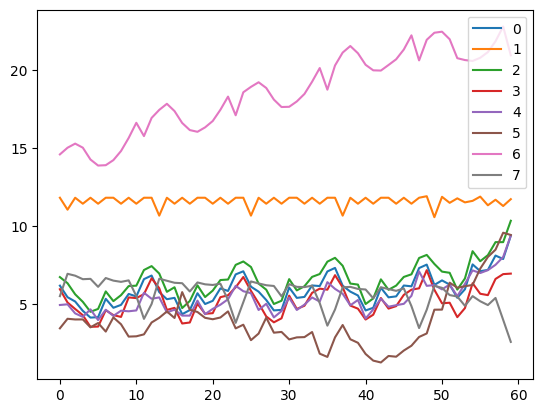

In [473]:
pd.DataFrame(scaler.transform(raw_res)).plot()

<Axes: >

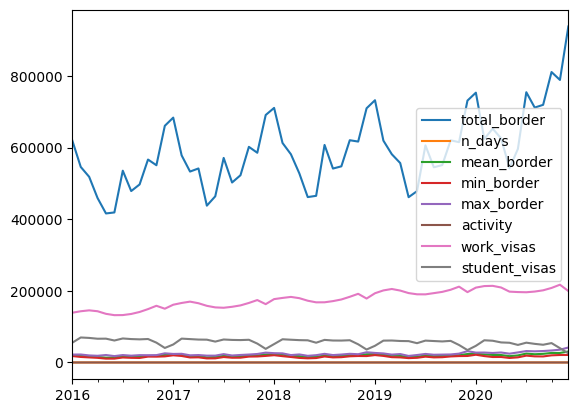

In [474]:
raw_res.plot()

In [475]:
df.head()

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
Period,,,,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0,2.7881,138975.0,55308.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0,3.2814,143052.0,69807.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0,3.2461,145572.0,68580.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0,3.2482,143088.0,66309.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0,2.8394,135846.0,66525.0


<Axes: xlabel='Period'>

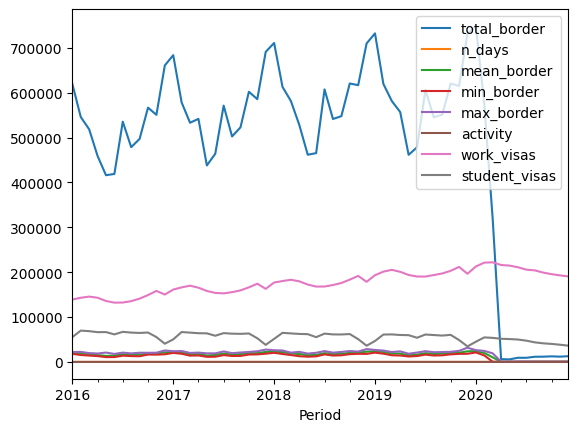

In [476]:
df.query('Period < "2021"').plot()

<Axes: >

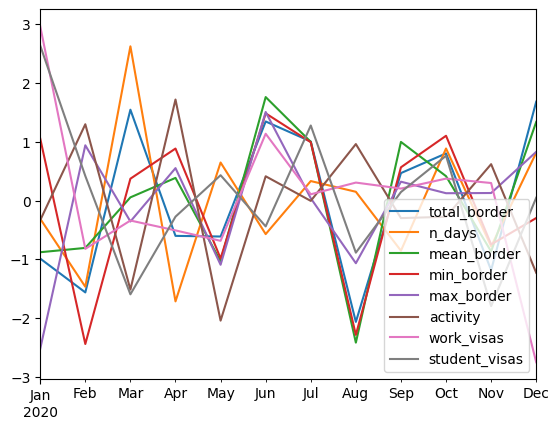

In [477]:
preds.plot()

In [478]:
#mod1.predict(start='2020-01-31', end='2020-12-31')

In [479]:
model = VAR(endog=df_trunc)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.endog, steps=2)

prediction

array([[7.23131369e+05, 3.10223890e+01, 2.33964997e+04, 2.03994001e+04,
        2.60904399e+04, 2.30046534e+00, 2.06723090e+05, 4.80076820e+04],
       [6.73266468e+05, 2.92475494e+01, 2.28983160e+04, 1.87680560e+04,
        2.70662105e+04, 2.38461992e+00, 2.08621404e+05, 4.81064866e+04]])

In [480]:
pd.date_range('2020-01-31', periods=2, freq='M')[1]

Timestamp('2020-02-29 00:00:00')

In [481]:
pd.date_range('2020-01-31', periods=12, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [482]:
pd.date_range('2023-06-30', periods=7, freq='M')[1:]

DatetimeIndex(['2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [483]:
# for1 = pd.DataFrame(res1.forecast(df2.values[-8:], steps=6),
#                     columns=df.columns,
#                     index  =pd.date_range('2023-06-30', periods=7, freq='M')[1:])

In [513]:
offset = len(df2_t)
preds2_df = pd.concat([df2_t, 
                      pd.DataFrame(index=pd.date_range('2020-01-31', periods=12, freq='M'),
                                   columns=df2_t.columns)])
preds2_ci_lower = pd.concat([df2_t, 
                      pd.DataFrame(index=pd.date_range('2020-01-31', periods=12, freq='M'),
                                   columns=df2_t.columns)])
preds2_ci_upper = pd.concat([df2_t, 
                      pd.DataFrame(index=pd.date_range('2020-01-31', periods=12, freq='M'),
                                   columns=df2_t.columns)])

for i in range(len(preds2_df)):
    if i < offset:
        continue
    train = preds2_df.iloc[0:i, ]
    mod = VAR(train)
    mod_fit = mod.fit(4)
    mod_forecast, t_ci_l, t_ci_u = mod_fit.forecast_interval(mod_fit.endog, steps=1)
    for j in range(len(mod_forecast[0])):
        preds2_df.iloc[i, j] = mod_forecast[0][j]
        preds2_ci_lower.iloc[i, j] = t_ci_l[0][j]
        preds2_ci_upper.iloc[i, j] = t_ci_u[0][j]

preds2_df

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
2016-03-31,0.420766,1.504109,-0.352508,0.414365,-0.659568,-0.654556,-0.118933,-1.490829
2016-04-30,-0.361704,-1.171709,0.199948,-0.003734,0.327408,0.047513,-0.479993,-0.041461
2016-05-31,0.122921,0.739589,-0.187328,-0.365576,0.671833,-0.508561,-0.454225,0.307110
2016-06-30,0.419669,-0.789449,0.789773,0.740256,-1.202970,0.784810,0.416216,-0.470882
2016-07-31,1.103360,0.739589,0.907053,1.009557,1.315513,-0.823127,0.453296,1.136927
2016-08-31,-1.786985,-0.407190,-1.774754,-1.381197,-1.088011,1.454752,0.347084,-0.669600
2016-09-30,0.716528,-0.407190,0.973406,0.179351,0.693967,-1.343725,0.302462,0.150149
2016-10-31,0.473049,0.739589,0.165348,1.342771,-0.404807,-0.349293,0.297120,0.235145
2016-11-30,-0.902022,-0.789449,-0.584159,-1.311958,0.059772,0.808625,0.177395,-1.037717
2016-12-31,1.227450,0.739589,0.945784,0.274888,1.043812,0.107549,-1.778113,-0.395955


<Axes: >

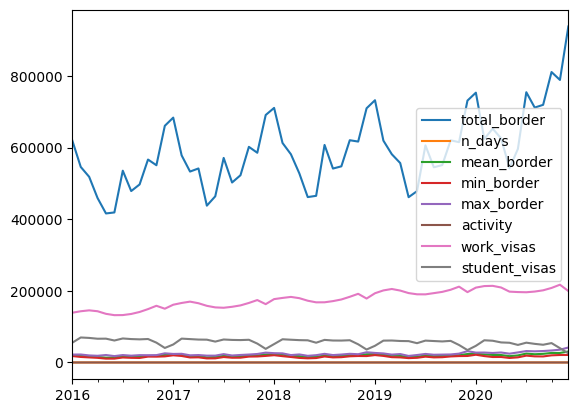

In [517]:
final_preds = inv_diff(preds2_df, df_initial, scaler)
final_preds.plot()

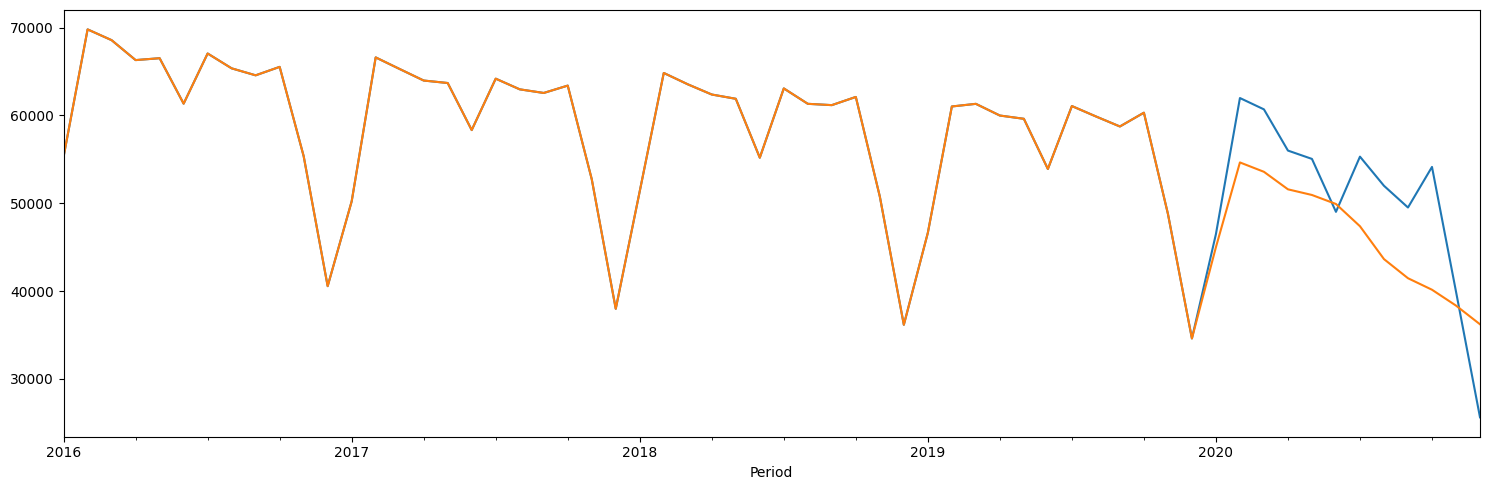

In [528]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(h*3, h))
final_preds['student_visas'].plot(ax=ax)
df.loc[:'2020', 'student_visas'].plot(ax=ax)
plt.tight_layout()
plt.show()

In [531]:
(final_preds.loc['2020', 'student_visas'] - df.loc['2020', 'student_visas']).sum()

52895.169353377554

<Axes: >

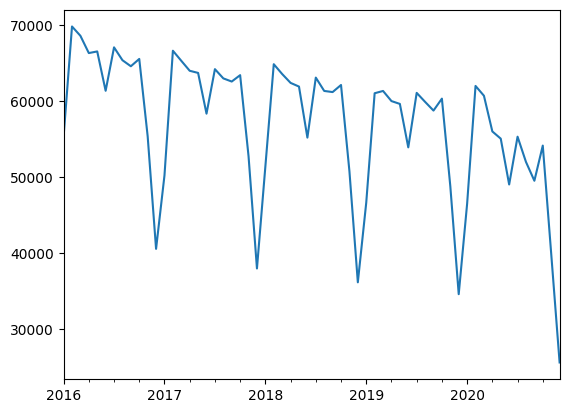

In [518]:
final_preds['student_visas'].plot()

# Executive Summary
A short summary of your research goal, methods and findings
• Use non-technical language, for a reader with no background in statistics
• 1 page maximum

# Background [1-2 pages]
• Describe the background of the project
• State the aims of the analysis, the specific question(s) you were asked to answer in the Detailed
Analysis

In our project, we are focusing on a time series dataset which is part of Statistics New Zealand's COVID-19 data portal @stats_c19 - specifically we have picked fee-paying student visas, total working visas, border crossings and the New Zealand Activity Index (NZAC). 

[[Change over covid, issues with university funding and interest of decreasing student visa numbers]]

### The Data
The main components of this work are the number of monthly fee-paying student visas, the monthly total number of work visas issued, and the number of daily border crossings which StatsNZ has obtained through the Ministry of Business, Innovation and Employment (MBIE) which is available standalone through MBIE's R Shiny app on their website @mbie_immi. [[]]

Of the datasets listed above, fee-paying student visas and total work visas were monthly while the total number of border crossings was daily data. [[]]

The NZAC is the last component of this work and was created in 2020 by the Treasury @NZAC_tn, but has since been extended to 2004 using historical data. This dataset is a monthly index that provides a summary of the eight constituent datasets which include data on: consumer spending, job vacancies, job-seeker numbers, electricity generation, and traffic data from both public and private institutions such as the Ministry of Social Development, ANZ and SEEK @NZAC_tn.

The NZAC is important as it is higher frequency than most economic datasets. Measures of GDP and the unemployment rate are released quarterly and can be revised for up to 2 years following release. It is well understood in the economics sector that accurate data can carry a 6-to-18-month lag, especially when considering the whole economy @NZAC_tn. These smaller indexes enable a faster release of data that is more up to date. The NZAC is a particularly useful dataset as it aims to reduce the noise that can be present in the component datasets, if used alone. The NZAC is highly correlated with Real GDP, which means that it could be helpful when making economic forecasts, or if you needed to know how the economy was performing before the quarterly GDP updates are released @NZAC_tn. @tbl-ds

In [575]:
#| include: True
#| tbl-cap: Datasets
#| tbl-label: tbl-ds
# [[numbering and caption]]
from IPython.display import HTML
HTML(pd.DataFrame({'Dataset':['Student Visas', 'Working Visas', 'Border Crossings', 'NZAC'],
                    'Frequency':['Monthly', 'Monthly', 'Daily', 'Monthly'],
                    'Start Date':['2015-01-31', '2015-01-31', '2016-01-01', '2004-01-31'],
                    'Original Source':['MBIE', 'MBIE', 'MBIE', 'Treasury'],
                    'Missing Values':[None, None, None, None]}).to_html(index=False))

Dataset,Frequency,Start Date,Original Source,Missing Values
Student Visas,Monthly,2015-01-31,MBIE,None
Working Visas,Monthly,2015-01-31,MBIE,None
Border Crossings,Daily,2016-01-01,MBIE,None
NZAC,Monthly,2004-01-31,Treasury,None


### The Question and Project

The research question for this project was:

* How many fee-paying students did New Zealand lose in 2020 due to border closures?

We thought this was interesting question as it involves the prediction of what might have happened to the number of fee-paying student visas issues if COVID-19 did not occur. This kinda of predictive analysis is fairly tricky, especially as many of the datasets may not provide perfect information about student visas, or about each other.

With this information we should be able to estimate how many fee-paying student visas would have been issued, and compare this to the actual number - this may be a useful figure for decision and policy makers to use in funding applications and decisions, as well as highlight the impact that foreign students have on university finances in New Zealand.

# Data Description, Preparation [1-2p] and EDA

• State the types of data in the dataset(s) and the structure of the dataset(s). Are the data numerical, categorical, or both? Time series? Coordinates? Diagnostic categories? This does NOT
need to be an exhaustive list of every variable, just a few comments on the overall types.

• Specifically state the attributes of any variables that are used in the Detailed Analysis, in particular for any categorical variables explain the meaning of their categories

• State how complete the dataset(s) are (i.e. how many missing, any structure to the missing data,
whether there are errors in the data

# Exploratory Data Analysis [3-4 pages]

• Revise the style and content of the EDA section from the Phase 1 group report in response to
the feedback you received about that report

• Select a subset of the results from the Phase 1 group report. You do not need to include every
plot from the EDA assignment. You may want to choose particular plots that turned out to be
most relevant for the detailed analysis.

• A few summary tables and/or plots, each describing one, two or three variables in the data that
you thought were interesting, or were relevant for the detailed analysis

• Tables can be summary statistics of individual variables, contingency tables for pairs of categorical variables, or results tables for basic analyses

• Explain the definitions of the variables in each table/plot

• Comment on the main features of each plot

• Include suitable labels and keys for each plot

• Make sure all plots would be readable if printed in black & white, and adjust the point sizes
and/or line thicknesses to improve readability

• Lay out all tables so that they are clearly readable and clearly labelled, and do not use excessive  significant figures

• All figures and tables should be numbered and should have captions

Outline the datasets here [[]] for the table below

In [669]:
#| include: True

# numbering and caption [[]]
# input data table

HTML(pd.DataFrame({'Dataset':['Student Visas', 'Working Visas', 'Border Arrivals', 'NZAC'],
                   'ResourceID':['CPVIS1', 'CPVIS2', 'CPTRA1', 'CPACT12'],
                   'Type':['Fee-paying Student Visas', 'Total Work Visas', 'Total Border Arrivals', 'Activity (NZAC)'],
                   'Frequency':['Monthly', 'Monthly', 'Daily', 'Monthly'],
                   'Minimum':[round(stu_df.describe().loc['min'],0)[0], 
                              round(work_df.describe().loc['min'],0)[0],
                              round(border_df_daily.describe().loc['min'],0)[0],
                              round(activ_df.describe().loc['min'],2)[0]],
                    'Median':[round(stu_df.describe().loc['50%'],0)[0], 
                              round(work_df.describe().loc['50%'],0)[0],
                              round(border_df_daily.describe().loc['50%'],0)[0],
                              round(activ_df.describe().loc['50%'],2)[0]],
                    'Maximum':[round(stu_df.describe().loc['max'],0)[0], 
                              round(work_df.describe().loc['max'],0)[0],
                              round(border_df_daily.describe().loc['max'],0)[0],
                              round(activ_df.describe().loc['max'],2)[0]]}).to_html(index=False))

Dataset,ResourceID,Type,Frequency,Minimum,Median,Maximum
Student Visas,CPVIS1,Fee-paying Student Visas,Monthly,15435.00,52166.00,69807.00
Working Visas,CPVIS2,Total Work Visas,Monthly,108300.00,167103.00,222039.00
Border Arrivals,CPTRA1,Total Border Arrivals,Daily,0.00,15537.00,31612.00
NZAC,CPACT12,Activity (NZAC),Monthly,-13.62,2.79,33.79


#### Timescale Issues
As the total border arrival dataset was daily data, and the others were monthly, we needed to deal with this somehow. We opted to downsample the daily data to monthly - taking each of the sum, mean, min, max values as well as the number of days in each month. We note that this may give rise to multicollearity concerns which we will address later. [[]]

Once we had the data aggregated, we simply merged all four datasets on the relevant time indicies.

#### Data Completeness
The four datasets we picked for this project cover different periods - Student and Working Visa datasets were available from 2015, while the NZAC was available from 2004 onwards. However, the Border arrivals was only available from 2016 and the period of interest is from the start of 2020.

This leaves us with an interesting problem. We need to filter the datasets so we have real values for all of them - this leads us to filter out all of the data prior to 2016, and after 2019 (as we don't want data leakage from the COVID-era).

Within this interval, we had no missing data in these datasets.

#### Variable Descriptions
* Total Arrivals is an integer variable that shows the sum of border arrivals in that month.
* Mean Border Arrivals is a float variable showing the mean border arrivals in that month.
* Min Border Arrivals is an integer variable that shows the minimum number of daily border arrivals in that month.
* Max Border Arrivals is an integer variable that shows the maximum number of daily border arrivals in that month.
* Days in Month is an integer variable that shows how many days were in the month.
* Activity index (NZAC) is a float variable that acts as a proxy measure for economic activity (similar to GDP).
* Work Visas is an integer variable that shows the total number of work visas issued in that month.
* Student Visas is an integer variable that shows the total number of fee-paying student visas issued in that month.

#### Component Datasets

Figure [[]] below shows the different constituents of the final dataset between 2016 and 2020 (inclusive).

Describe them a bit more here [[]]

In [664]:
nice_names = {'total_border':'Total Arrivals',
                'n_days':'Days in Month',
                'mean_border':'Mean Border Arrivals',
                'min_border':'Min Border Arrivals',
                'max_border':'Max Border Arrivals',
                'activity':'Activity Index',
                'work_visas':'Work Visas',
                'student_visas':'Student Visas'}

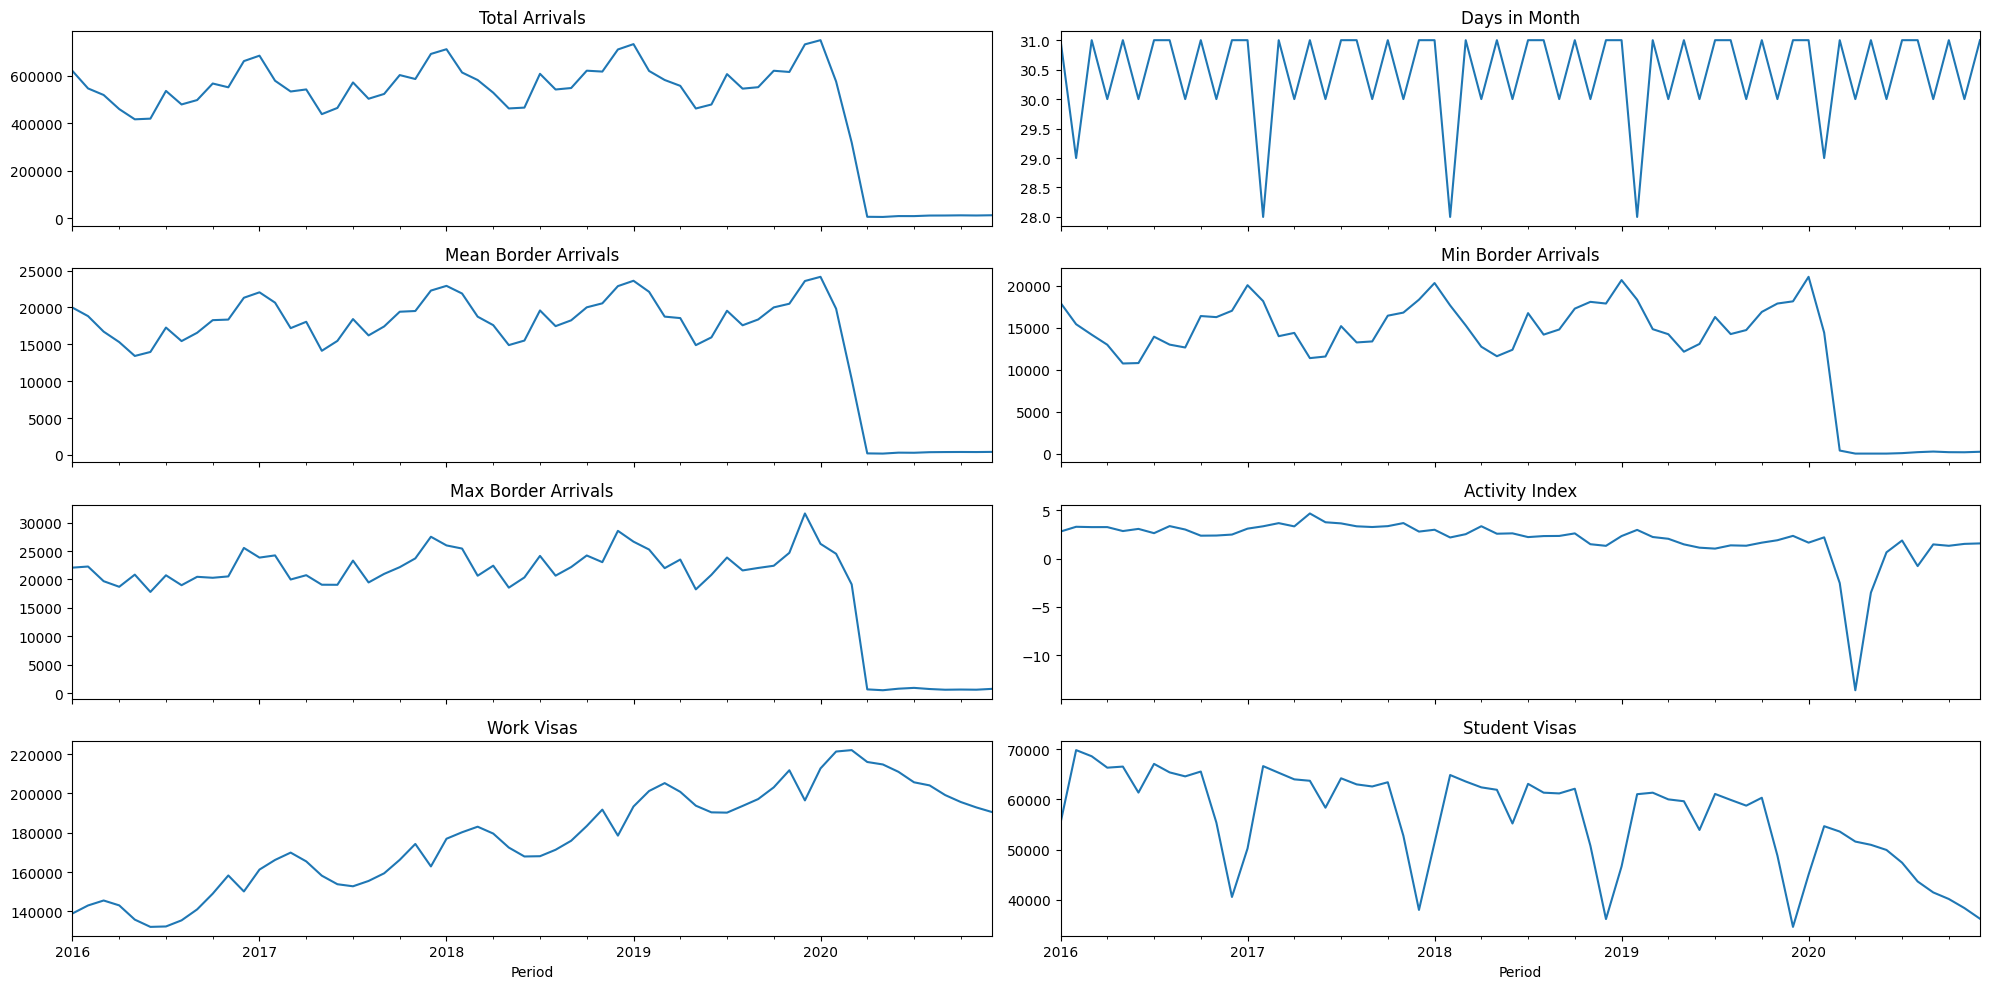

In [665]:
#| include: True

# numbering and caption, y axis and overall font size

h=10
counter = 0
f, ax = plt.subplots(nrows=4, ncols=2, 
                     figsize=(h*2, h),
                     sharex=True)
ax = ax.ravel()
df_nice = df.rename(nice_names, axis=1)
#plt.title('Final dataset values, 2016 to 2020 (inclusive)')
for col in df_nice.columns:
    df_nice.loc['2016':'2020', col].plot(ax=ax[counter])
    ax[counter].set_title(f"{col}")
    counter += 1
plt.tight_layout()
plt.show()

[[ describe above table ]]

Describe how we came to the final dataset in t erms of downsampling, merging and filtering dates [[]]

In [668]:
# #| include: True

# # number and caption [[]]
# # think about dropping first decimal via pd style formatter?
# df_rep = df.copy()
# df_rep['mean_border'] = round(df_rep['mean_border'], 0)
# HTML(df_rep.rename(nice_names, axis=1).reset_index().head(3).to_html(index=False))

Describe the final dataset [[]]

Line plots (2x4 of line plots? - over full date range?)


Correlation plots

Seasonal Decomp

# Ethics, Privacy and Security [1-2 pages]
• Include this section from the Phase 1 group report, but revise it in response to the feedback that
you received about that report
• Brief discussion of any ethical considerations that apply to your project
• Brief discussion of any privacy concerns that might arise connected to your project
• Brief discussion of what steps you could take to keep your project data and results secure (you
do NOT need to carry this out, you just need to talk about it in the report)

### Ethics
The dataset is produced by the MBIE and the Treasury and then published as part of the Statistics New Zealand COVID-19 data portal. This data is made available under the [Crown Copyright, Attribution 4.0 International (CC BY 4.0)](https://www.treasury.govt.nz/publications/nzac/nzac-qa-note) license which allows free use, adaptation and distribution of the data as long as the source is attributed, and a link to the license is provided (see earlier in the sentence).

The three datasets from MBIE were all a result of their direct measurement, and there do not appear to be any license details on their website @mbie_immi. 

The NZAC dataset is derived from constituent datasets that are also publicly available as either full datasets, or as data products. As far as we can tell, none of these datasets have licensing at all - although we believe it is reasonable to expect that Treasury has permission to utilise these datasets and publicly release their derivative product under their own license, which we will respect in using this data.

We also believe that all of these datasets was collected with informed consent (as it was mostly either measured values, or through a survey response) and we *assume* that this usage of the data falls within the original bounds of the consent (although this data may have also been obtained through lawful compulsion through the Data and Statistics Act).

The datasets have clear ownership, licensing/terms of use, and transparency of where the data came from. As long as we adhere to the terms of the license, it seems difficult to identify any ethical issues in the use of this dataset.

### Privacy
The MBIE datasets are a result of direct measurements with aggregation and obfuscation measures @mbie_immi. It seems difficult to identify any potential privacy issues with the use of this data.

The NZAC dataset is a series of monthly values which is a combination of multiple datasets. We note that some of the constituent datasets are derived from surveys which may have individual-level, identifying data (although we have not seen these datasets publicly available - these are more likely to be seen as data products). As the final, available data is tightly aggregated, we do not see any potential for de-anonymisation or risk of identifying data being released.

Based on the above, we do not believe there to be any obvious privacy issues with these datasets.

### Security
In uploading/updating the dataset on the appropriate website, the organisation needs to ensure that only the necessary people have the ability to access and modify these files. This is an access control mechanism to limit exposure as to who could potentially upload something malicious, or perhaps more likely, reuse a password and let in a blackhat who may choose to do the same.

We also need to be mindful here that the file itself is the correct one, and not some secret or embargoed data, and that it does not accidentally leak metadata (such as who worked on it, commentary from reviewers, exif data in case of images etc).

When the file has been uploaded, the database or server needs to be well defended to deter opportunistic (or targeted) attacks which may aim to change the file (malware, viruses etc - an integrity issue) or deny access to the file (DDOS - an availability issue). For this, we need a properly configured host, which can be a challenge for some (although hopefully not for either the Reserve Bank or Stats New Zealand).

When a user attempts to access/download the file, we must also ensure the integrity of the data from host to client. There are a few ways of doing this, but the most common would be by employing HTTPS in an attempt to thwart man-in-the-middle attacks. Additionally we might provide encryption, or a verification hash. A user might also elect to use a VPN or TOR-like browser, and a firewall and/or anti-virus. 

In the specific case of this dataset, StatsNZ offers HTTPS by default, although no verification hash we are aware of. It is difficult to know the specifics of their defenses (which is a good thing). The data is provided in a .csv file, which is a fairly safe filetype given it is pure text data (instead of something like a .pdf or office documents which can utilise macros).

We do not observe any particular security issues related to this dataset.

For our project, the main source of security issues would be in the communication and sharing of files between group members. We have set up a Github repository in order to do this sharing. The repository mitigates many of these potential issues that we might otherwise have in sharing files by email or discord. The repository also features strict access controls in the form of a white-list, and Github itself requires authentication to access (usually in the form of a ssh key or personal access token) which disallows contributions from bad actors (excluding anyone working a Github/Microsoft that is). Although, if one was conniving enough, the information contained in the Github repository may allow someone to do some social engineering, although the attacker would likely have to put in a lot of effort into a (very) low value target.

We do not have any specific counter-measures related to our project outside of good internet hygiene (don't go visiting dodgy sites, or clicking on emails from Nigerian royalty), use a firewall and/or anti-virus, knowing who your group members are, and limiting physical access to your devices.

For the individual portion of the report, we do not forsee any additional issues arising.

# Detailed Analysis Results [3-4 pages]
• Explain what analysis techniques you used, and why they were suitable for the data and for the
question you needed to answer
• Explain any steps you took to manipulate the data, e.g. converting to logarithmic scale, stan-
dardizing continuous variables, etc.
• Explain what you did to account for any missing data
• For each part of the analysis, provide plots/tables/diagrams of the results that will help the
reader to understand the results of the analysis
• Make sure all plots/tables/diagrams are readable and clearly labelled
• If you have been asked to include predictions, state these clearly
• Include estimates of the uncertainty for any results or predictions
• Comment on any biases that you think might exist in the data or the results

Stationarity/number of differences required/use of scaling

ACF/PACF and number of lags (AIC/BIC/FPE/HQIC => 4)

Granger causality tests

CV: RMSE/MAPE

Prediction => Graph/interval and description

How many students lost, bring it back to the question

Note possible multicollinearity

# Conclusions and Recommendations [1-2 pages]
• State the main conclusions of your work: if you have already presented these in the results, then
this is a very short chapter.
• State any recommendations that you would make in light of your findings
• Discuss the limitations of your findings
• (optional) State what future work might be suggested by what you have done

The project report should be around 10-12 pages including references but excluding any appendices.
You should use font size 11 or 12. There should only be about 8 pages of text, i.e. you should not fill
12 pages unless most of them are plots! Excessive length will be penalised. Shorter is OK, as long as
the meaning is clear.
The Background and Data Description sections may be expanded versions of the Background and
Data section in the Phase 1 group report. The Ethics, Privacy and Security and Exploratory Data
Analysis sections are expected to be revised versions of the sections in the Phase 1 report. Note that
although students are expected to use the Phase 1 EDA report as the starting point for the Phase 2
individual report, it is not sufficient to resubmit the EDA report as the individual report, and students
will receive zero marks for doing so.
The Executive Summary must not be longer than one page, and it should be written in a non-technical
style, as if intended for readers who do not have a background in statistics or data science.
Proofread your report carefully – and give it to someone else to read. If English is not your first
language that won’t affect your grade – but what you do write must be clear. (Native English speakers:
don’t embarrass yourself!